In [2]:
#-----------------------------------------------------------------------
# evaluate_2nd_price_grandbundle_integral.py
# Author: Rebecca Barber
# 
# if you try to calculate E[second highest value of v_1 + v_2], where 
# v_1 and v_2 are both drawn from ER curve, gets really messy. try to 
# evaluate empirically
#-----------------------------------------------------------------------

import numpy as np
from math import *
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

for info on how to calculate integrals using python, see here: https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

In [4]:
# integrand for expected revenue of second price auction on grand bundle of two items
# (value for both items drawn from ER curve)
def integrand(x, n):
    cdf = 1 - 2/x - (2*log(x-1))/x**2
    first = cdf**n
    second = n * cdf**(n-1) * (1-cdf)
    return 1 - first - second
# def integrand(x, n):
#     cdf = 1-1/x
#     first = cdf**n
#     second = n * cdf**(n-1) * (1-cdf)
#     return 1 - first - second

In [5]:
min_bidders = 2
max_bidders = 100000
num_bidders = list(range(min_bidders,max_bidders+1))

In [6]:
revs = []
adj_revs = []
print('bidders:', end ='')
for n in num_bidders:
    if n % 1000 == 0: print('  ', n, end ='')
    integral = quad(integrand, 2, inf, args=(n))
    rev = 2 + integral[0]
    revs.append(rev)
    adj_rev = rev - 2 * n
    adj_revs.append(adj_rev)

bidders:   1000   2000   3000   4000   5000   6000   7000   8000   9000   10000   11000   12000   13000   14000   15000   16000   17000   18000   19000   20000   21000   22000   23000   24000   25000   26000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  


   27000   28000   29000

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


   30000   31000   32000   33000   34000   35000   36000   37000   38000   39000   40000   41000   42000   43000   44000   45000   46000   47000   48000   49000   50000   51000   52000   53000   54000   55000   56000   57000   58000   59000   60000   61000   62000   63000   64000   65000   66000   67000   68000   69000   70000   71000   72000   73000   74000   75000   76000   77000   78000   79000   80000   81000   82000   83000   84000   85000   86000   87000   88000   89000   90000   91000   92000   93000   94000   95000   96000   97000   98000   99000   100000

In [7]:
# clean the results to get rid of computer errors
num_bidders = [num_bidders[i] for i in range(len(adj_revs)) if adj_revs[i] > -1]
revs = [revs[i] for i in range(len(adj_revs)) if adj_revs[i] > -1]
adj_revs = [i for i in adj_revs if i > -1]

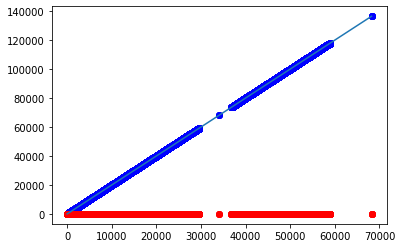

In [8]:
bench = [2*n for n in num_bidders]
plt.plot(num_bidders, revs, 'bo')
plt.plot(num_bidders, adj_revs, 'ro')
plt.plot(num_bidders, bench)

<Figure size 648x360 with 0 Axes>

Text(0.5, 1.0, 'Second Price Auction on Grand Bundle (m = 2)')

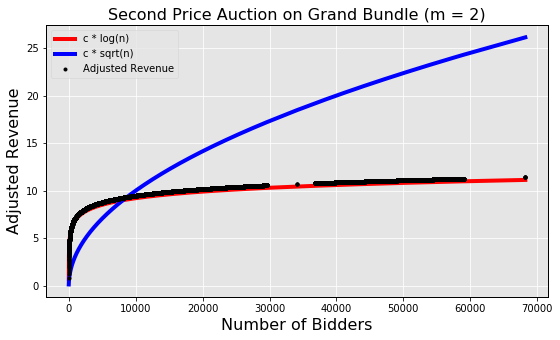

In [46]:
log_bench = [np.log(n) for n in num_bidders]
sqrt_bench = [np.sqrt(n)/10 for n in num_bidders]

figure_name = './figures/2nd_price_evaluate_integral' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders.png'

plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
             num_bidders, sqrt_bench, 'b-',
             num_bidders, adj_revs,'ko',
             markersize=3, linewidth = 4)
plt.legend(['c * log(n)', 'c * sqrt(n)', 'Adjusted Revenue'])
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Adjusted Revenue', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')
plt.title("Second Price Auction on Grand Bundle (m = 2)", fontsize = 16)
plt.savefig(figure_name, dpi=300)

In [14]:
# make dataframe for plotting
rev_df_all = pd.DataFrame(columns=['num bidders', 'adj_rev', 'legend'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    adj_rev = adj_revs[i]
    sqrt_val = sqrt_bench[i]
    log_val = log_bench[i]

    rev_df_all = rev_df_all.append({'num bidders': n, 'adj_rev': adj_rev, 'Legend': 'Revenue'}, 
            ignore_index=True)
    rev_df_all = rev_df_all.append({'num bidders': n, 'adj_rev': sqrt_val, 'Legend': 'c * sqrt(n)'}, 
            ignore_index=True)
    rev_df_all = rev_df_all.append({'num bidders': n, 'adj_rev': log_val, 'Legend': 'c * log(n)'}, 
            ignore_index=True)

KeyboardInterrupt: 

In [ ]:
# x labels
x_breaks = []
x_jumps = int((max_bidders - min_bidders) / 10)
for x in range(min_bidders, max_bidders+1, x_jumps): x_breaks.append(x)

# make the graph
plt1 = ggplot(aes(x='num bidders', y = 'adj_rev', color = 'Legend', group = 'Legend'), data=rev_df_all) + \
    geom_line() +\
    theme(axis_text_x = element_text(color = 'black'), axis_text_y = element_text(color = 'black')) + \
    labs(x="Number of Bidders", y="Adjusted Revenue", title = "Second Price Auction on Grand Bundle (m = 2)") + \
    scale_x_discrete(breaks=x_breaks)

figure_name = './figures/2nd_price_evaluate_integral' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders'

ggsave(filename=figure_name,
   plot=plt1,
   device='png', dpi = 200)

In [47]:
# DOUBLE CHECK THIS!!!!!!
# For fitting y = A log x + B, just fit y against (log x)
# For fitting y = A sqrt x + B, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), adj_revs, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), adj_revs, 1, full = True)
print('log fit: a =', log_fit[0][0], 'b =', log_fit[0][1], 'error =', log_fit[1][0])
print('sqrt fit: a =', sqrt_fit[0][0], 'b =', sqrt_fit[0][1], 'error =', sqrt_fit[1][0])

log fit: a = 1.0096591407006188 b = 0.1681624261713205 error = 3.178659039298497
sqrt fit: a = 0.01650652533281354 b = 7.564030451982522 error = 6736.466567967631
